In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('..')

import heat_load_calc.weather.solar_position as x05
import heat_load_calc.weather.region_location as x36

In [2]:
region = np.array([1,2,3,4,5,6,7,8])

In [3]:
# 緯度, rad & 経度, rad
phi_loc, lambda_loc = np.vectorize(x36.get_phi_loc_and_lambda_loc)(region)
phi_loc = phi_loc.reshape([-1,1])
lambda_loc = lambda_loc.reshape([-1,1])
phi_loc, lambda_loc

(array([[0.76480328],
        [0.75415677],
        [0.69289571],
        [0.6398377 ],
        [0.63791784],
        [0.60493112],
        [0.55745816],
        [0.4574508 ]]), array([[2.51170333],
        [2.47470235],
        [2.46388131],
        [2.41204503],
        [2.44119202],
        [2.33734493],
        [2.2937117 ],
        [2.22852366]]))

In [4]:
# 標準子午線(meridian), rad
lambda_loc_mer = x05.get_lambda_loc_mer()
lambda_loc_mer

2.356194490192345

In [5]:
# ステップnにおける年通算日（1/1を1とする） * 365 * 96
d_ns = x05.get_d_ns()
d_ns

array([  1,   1,   1, ..., 365, 365, 365])

In [6]:
# 1968年との年差
n = x05.get_n()
n

21

In [7]:
# 平均軌道上の近日点通過日（暦表時による1968年1月1日正午基準の日差）, d
d_0 = x05.get_d_0(n=n)
d_0

3.1616

In [8]:
# ステップnにおける平均近点離角, rad * 365 * 96
m_ns = x05.get_m_ns(d_ns=d_ns, d_0=d_0)

In [9]:
m_ns

array([-0.03718378, -0.03718378, -0.03718378, ...,  6.22433392,
        6.22433392,  6.22433392])

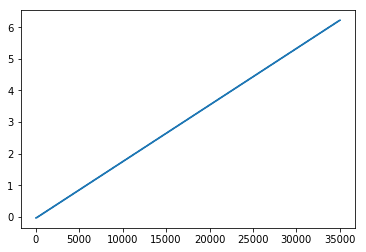

In [10]:
plt.plot(m_ns)

In [11]:
# ステップnにおける近日点と冬至点の角度, rad * 365 * 96
epsilon_ns = x05.get_epsilon_ns(m_ns=m_ns, n=n)

In [12]:
epsilon_ns

array([0.22255039, 0.22255039, 0.22255039, ..., 0.22284955, 0.22284955,
       0.22284955])

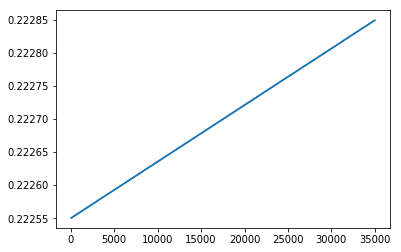

In [13]:
plt.plot(epsilon_ns)

In [14]:
# ステップnにおける真近点離角, rad * 365 * 96
v_ns = x05.get_v_ns(m_ns=m_ns)

In [15]:
v_ns

array([-0.03845158, -0.03845158, -0.03845158, ...,  6.2223281 ,
        6.2223281 ,  6.2223281 ])

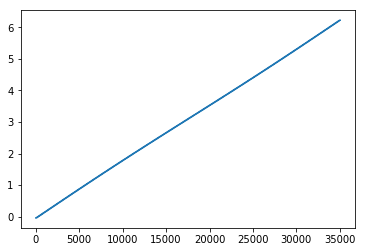

In [16]:
plt.plot(v_ns)

In [17]:
# ステップnにおける均時差, rad * 365 * 96
e_t_ns = x05.get_e_t_ns(m_ns=m_ns, epsilon_ns=epsilon_ns, v_ns=v_ns)

In [18]:
e_t_ns

array([-0.01485485, -0.01485485, -0.01485485, ..., -0.01226382,
       -0.01226382, -0.01226382])

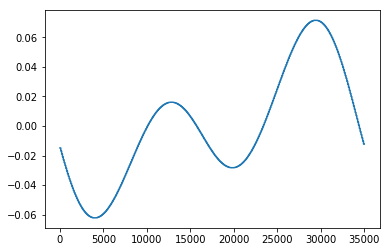

In [19]:
plt.plot(e_t_ns)

In [20]:
# 赤緯, rad * 8760 * 96
delta_ns = x05.get_delta_ns(epsilon_ns=epsilon_ns, v_ns=v_ns)

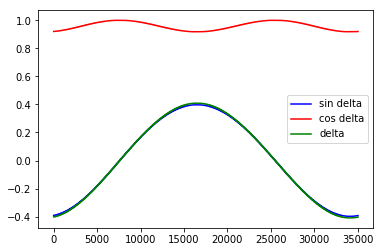

In [21]:
plt.plot(np.sin(delta_ns), 'b', label='sin delta')
plt.plot(np.cos(delta_ns), 'r', label='cos delta')
plt.plot(delta_ns, 'g', label='delta')
plt.legend()
plt.show()

In [22]:
# ステップnにおける標準時, d * 365 * 96
# ndarray[ 0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, .... , 23.75, 0, 0.25, ...23.75 ]
t_m_ns = x05.get_t_m_ns()

In [23]:
t_m_ns

array([ 0.  ,  0.25,  0.5 , ..., 23.25, 23.5 , 23.75])

In [24]:
# ステップnにおける時角, rad * 365 * 96
omega_ns = x05.get_omega_ns(t_m_ns=t_m_ns, lambda_loc=lambda_loc, lambda_loc_mer=lambda_loc_mer, e_t_ns=e_t_ns)

In [25]:
omega_ns

array([[-3.00093867, -2.93548882, -2.87003898, ...,  3.08848813,
         3.15393798,  3.21938782],
       [-3.03793965, -2.9724898 , -2.90703996, ...,  3.05148715,
         3.116937  ,  3.18238684],
       [-3.04876069, -2.98331085, -2.917861  , ...,  3.04066611,
         3.10611596,  3.1715658 ],
       ...,
       [-3.17529706, -3.10984722, -3.04439737, ...,  2.91412974,
         2.97957959,  3.04502943],
       [-3.21893029, -3.15348045, -3.0880306 , ...,  2.87049651,
         2.93594635,  3.0013962 ],
       [-3.28411834, -3.21866849, -3.15321865, ...,  2.80530846,
         2.87075831,  2.93620815]])

In [26]:
# 太陽高度, rad * 8760 * 96
h_s_ns = x05.get_h_sun_ns(phi_loc, omega_ns, delta_ns)
h_s_2_ns = np.clip(h_s_ns, 0.0, None)

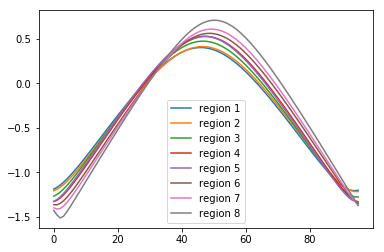

In [27]:
plt.plot(h_s_ns[0][0:96], label='region 1')
plt.plot(h_s_ns[1][0:96], label='region 2')
plt.plot(h_s_ns[2][0:96], label='region 3')
plt.plot(h_s_ns[3][0:96], label='region 4')
plt.plot(h_s_ns[4][0:96], label='region 5')
plt.plot(h_s_ns[5][0:96], label='region 6')
plt.plot(h_s_ns[6][0:96], label='region 7')
plt.plot(h_s_ns[7][0:96], label='region 8')
plt.legend()
plt.show()

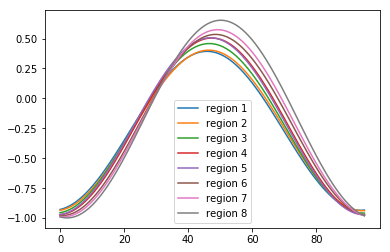

In [28]:
plt.plot(np.sin(h_s_ns)[0][0:96], label='region 1')
plt.plot(np.sin(h_s_ns)[1][0:96], label='region 2')
plt.plot(np.sin(h_s_ns)[2][0:96], label='region 3')
plt.plot(np.sin(h_s_ns)[3][0:96], label='region 4')
plt.plot(np.sin(h_s_ns)[4][0:96], label='region 5')
plt.plot(np.sin(h_s_ns)[5][0:96], label='region 6')
plt.plot(np.sin(h_s_ns)[6][0:96], label='region 7')
plt.plot(np.sin(h_s_ns)[7][0:96], label='region 8')
plt.legend()
plt.show()

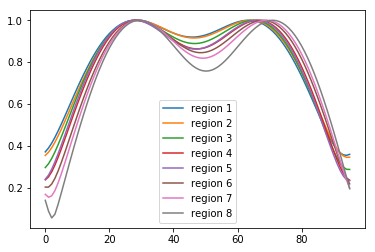

In [29]:
plt.plot(np.cos(h_s_ns)[0][0:96], label='region 1')
plt.plot(np.cos(h_s_ns)[1][0:96], label='region 2')
plt.plot(np.cos(h_s_ns)[2][0:96], label='region 3')
plt.plot(np.cos(h_s_ns)[3][0:96], label='region 4')
plt.plot(np.cos(h_s_ns)[4][0:96], label='region 5')
plt.plot(np.cos(h_s_ns)[5][0:96], label='region 6')
plt.plot(np.cos(h_s_ns)[6][0:96], label='region 7')
plt.plot(np.cos(h_s_ns)[7][0:96], label='region 8')
plt.legend()
plt.show()

In [30]:
# 太陽方位角, rad, 太陽方位角の正弦, 太陽方位角の余弦
a_s_ns = [x05.get_a_sun_ns(omega, phi[0], delta_ns, h_s) for (omega, phi, h_s) in zip(omega_ns, phi_loc, h_s_ns)]

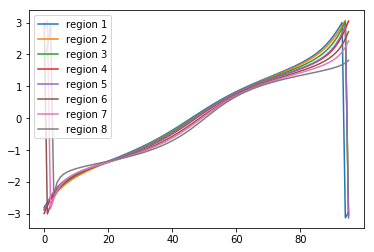

In [31]:
plt.plot(a_s_ns[0][0:96], label='region 1')
plt.plot(a_s_ns[1][0:96], label='region 2')
plt.plot(a_s_ns[2][0:96], label='region 3')
plt.plot(a_s_ns[3][0:96], label='region 4')
plt.plot(a_s_ns[4][0:96], label='region 5')
plt.plot(a_s_ns[5][0:96], label='region 6')
plt.plot(a_s_ns[6][0:96], label='region 7')
plt.plot(a_s_ns[7][0:96], label='region 8')
plt.legend()
plt.show()

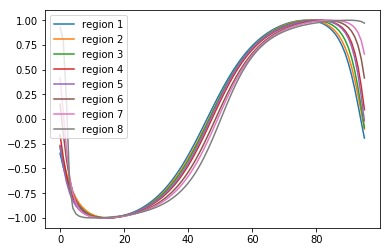

In [32]:
plt.plot(np.sin(a_s_ns[0])[0:96], label='region 1')
plt.plot(np.sin(a_s_ns[1])[0:96], label='region 2')
plt.plot(np.sin(a_s_ns[2])[0:96], label='region 3')
plt.plot(np.sin(a_s_ns[3])[0:96], label='region 4')
plt.plot(np.sin(a_s_ns[4])[0:96], label='region 5')
plt.plot(np.sin(a_s_ns[5])[0:96], label='region 6')
plt.plot(np.sin(a_s_ns[6])[0:96], label='region 7')
plt.plot(np.sin(a_s_ns[7])[0:96], label='region 8')
plt.legend()
plt.show()

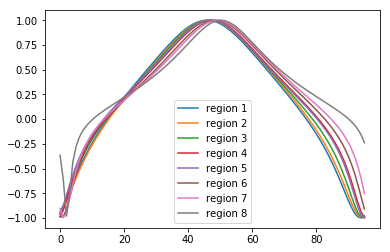

In [33]:
plt.plot(np.cos(a_s_ns[0])[0:96], label='region 1')
plt.plot(np.cos(a_s_ns[1])[0:96], label='region 2')
plt.plot(np.cos(a_s_ns[2])[0:96], label='region 3')
plt.plot(np.cos(a_s_ns[3])[0:96], label='region 4')
plt.plot(np.cos(a_s_ns[4])[0:96], label='region 5')
plt.plot(np.cos(a_s_ns[5])[0:96], label='region 6')
plt.plot(np.cos(a_s_ns[6])[0:96], label='region 7')
plt.plot(np.cos(a_s_ns[7])[0:96], label='region 8')
plt.legend()
plt.show()

